In [1]:
from selenium import webdriver
import pandas as pd
from pandas import DataFrame
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from datetime import date, timedelta



In [2]:
def Stock_Dataset(from_day,from_month,from_year,to_day,to_month,to_year,company):
    web = webdriver.Chrome()
    web.get('https://www.moneycontrol.com/stocks/histstock.php')
    time.sleep(6)
    FromDate = web.find_element_by_xpath('//*[@id="mc_mainWrapper"]/div[3]/div[1]/div[7]/div[2]/div[6]/table/tbody/tr/td[1]/form/div[2]/select[1]')
    FromDate.send_keys(from_day)

    FromMonth = web.find_element_by_xpath('//*[@id="mc_mainWrapper"]/div[3]/div[1]/div[7]/div[2]/div[6]/table/tbody/tr/td[1]/form/div[2]/select[2]')
    FromMonth.send_keys(from_month)

    FromYear = web.find_element_by_xpath('//*[@id="mc_mainWrapper"]/div[3]/div[1]/div[7]/div[2]/div[6]/table/tbody/tr/td[1]/form/div[2]/select[3]')
    FromYear.send_keys(from_year)


    toDate = web.find_element_by_xpath('//*[@id="mc_mainWrapper"]/div[3]/div[1]/div[7]/div[2]/div[6]/table/tbody/tr/td[1]/form/div[4]/select[1]')
    toDate.send_keys(to_day)

    toMonth = web.find_element_by_xpath('//*[@id="mc_mainWrapper"]/div[3]/div[1]/div[7]/div[2]/div[6]/table/tbody/tr/td[1]/form/div[4]/select[2]')
    toMonth.send_keys(to_month)

    toYear = web.find_element_by_xpath('//*[@id="mc_mainWrapper"]/div[3]/div[1]/div[7]/div[2]/div[6]/table/tbody/tr/td[1]/form/div[4]/select[3]')
    toYear.send_keys(to_year)

    Company = web.find_element_by_xpath('//*[@id="mycomp"]')
    Company.send_keys(company)
    time.sleep(10)
    Company.send_keys(" ");
    time.sleep(2)
    web.find_element_by_xpath('//*[@id="suggest"]/ul/li[1]/a').click()
    time.sleep(6)
    Go = web.find_element_by_xpath('//*[@id="mc_mainWrapper"]/div[3]/div[1]/div[7]/div[2]/div[6]/table/tbody/tr/td[1]/form/div[4]/input[1]')
    Go.click()
    time.sleep(6)

    window_after = web.window_handles[0]
    web.switch_to.window(window_after)

    no_of_rows = len(web.find_elements_by_xpath('//*[@id="mc_mainWrapper"]/div[3]/div[1]/div[6]/div[4]/table/tbody/tr'))
    no_of_cols = len(web.find_elements_by_xpath('//*[@id="mc_mainWrapper"]/div[3]/div[1]/div[6]/div[4]/table/tbody/tr[1]/th'))

    dataset = []

    for row in range(3,no_of_rows + 1):
        datasetrow = []
        for column in range(1,no_of_cols + 2):
            value = web.find_element_by_xpath('//*[@id="mc_mainWrapper"]/div[3]/div[1]/div[6]/div[4]/table/tbody/tr[' + str(row) + ']/td[' + str(column) + ']').text
            datasetrow.append(value)
        dataset.append(datasetrow)

    dict_dataset = {'Date': [], 'Open' : [], 'High' : [], 'Low': [], 'Close': [], 'Volume': [],'High-Low': [], 'Open-Close': []}

    column_name = ['Date', 'Open','High','Low','Close','Volume','High-Low','Open-Close']

    for i in range(0,len(dataset)):
        for j in range(0,no_of_cols  +1):
            dict_dataset[column_name[j]].append(dataset[i][j])

    df = pd.DataFrame(dict_dataset)
    df['Open'] = df['Open'].astype(float)
    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Close'] = df['Close'].astype(float)
    df['Volume'] = df['Volume'].astype(float)
    df['High-Low'] = df['High-Low'].astype(float)
    df['Open-Close'] = df['Open-Close'].astype(float)
    df['Date'] = pd.to_datetime(df['Date'])

    return df

"""
dummy data to dry run the code.
"""




'\ndummy data to dry run the code.\n'

In [42]:


today = date.today()
current_date = today.strftime("%b%d%Y")  
month_old_date = (date.today()-timedelta(days=90)).strftime("%b%d%Y")
print(month_old_date)
###############################################################################
from_day = month_old_date[3:5]
from_month = month_old_date[0:3]
from_year = month_old_date[5:]
to_day = current_date[3:5]
to_month = current_date[0:3]
to_year = current_date[5:]
company = "Hero Motocorp"
# ################################ End Of Dummy Data #############################
m = Stock_Dataset(from_day,from_month,from_year,to_day,to_month,to_year,company)
m.to_csv(company + '.csv')
print(m)




Sep132020
         Date     Open     High      Low    Close    Volume  High-Low  \
0  2020-10-13  3285.00  3300.50  3258.10  3288.30   20275.0     42.40   
1  2020-12-10  3345.00  3355.00  3275.25  3283.20   30033.0     79.75   
2  2020-09-10  3300.00  3336.70  3270.00  3330.35   26852.0     66.70   
3  2020-08-10  3240.00  3292.00  3239.00  3278.05   29594.0     53.00   
4  2020-07-10  3138.70  3249.75  3138.70  3232.70   72405.0    111.05   
5  2020-06-10  3150.00  3177.70  3117.35  3138.70   32294.0     60.35   
6  2020-05-10  3215.00  3230.00  3095.00  3128.70   36161.0    135.00   
7  2020-01-10  3190.00  3197.50  3114.35  3151.70   27033.0     83.15   
8  2020-09-30  3208.00  3208.00  3135.00  3145.85   23647.0     73.00   
9  2020-09-29  3113.70  3221.60  3103.10  3175.85   69659.0    118.50   
10 2020-09-28  3054.00  3095.00  2999.30  3088.60   44058.0     95.70   
11 2020-09-25  2926.00  3015.00  2926.00  3000.45   26181.0     89.00   
12 2020-09-24  2910.00  2947.30  2901.40 

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

dataset_train = pd.read_csv('Hero Motocorp.csv')
dataset_train.head()
cols = list(dataset_train)[2:9]

datelist_train = list(dataset_train['Date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)
#dataset_train['Date'] = dataset_train['Date'].astype(float)
print(dataset_train)
#dataset_train = pd.to_numeric(dataset_train,errors='coerce')


training_set = dataset_train.values

print('Shape of training set == {}.'.format(training_set.shape))
training_set
#training_set= training_set.astype(float)


Training set shape == (21, 9)
All timestamps == 21
Featured selected: ['Open', 'High', 'Low', 'Close', 'Volume', 'High-Low', 'Open-Close']
       Open     High      Low    Close    Volume  High-Low  Open-Close
0   3285.00  3300.50  3258.10  3288.30   20275.0     42.40       -3.30
1   3345.00  3355.00  3275.25  3283.20   30033.0     79.75       61.80
2   3300.00  3336.70  3270.00  3330.35   26852.0     66.70      -30.35
3   3240.00  3292.00  3239.00  3278.05   29594.0     53.00      -38.05
4   3138.70  3249.75  3138.70  3232.70   72405.0    111.05      -94.00
5   3150.00  3177.70  3117.35  3138.70   32294.0     60.35       11.30
6   3215.00  3230.00  3095.00  3128.70   36161.0    135.00       86.30
7   3190.00  3197.50  3114.35  3151.70   27033.0     83.15       38.30
8   3208.00  3208.00  3135.00  3145.85   23647.0     73.00       62.15
9   3113.70  3221.60  3103.10  3175.85   69659.0    118.50      -62.15
10  3054.00  3095.00  2999.30  3088.60   44058.0     95.70      -34.60
11  2926.

array([[ 3.28500e+03,  3.30050e+03,  3.25810e+03,  3.28830e+03,
         2.02750e+04,  4.24000e+01, -3.30000e+00],
       [ 3.34500e+03,  3.35500e+03,  3.27525e+03,  3.28320e+03,
         3.00330e+04,  7.97500e+01,  6.18000e+01],
       [ 3.30000e+03,  3.33670e+03,  3.27000e+03,  3.33035e+03,
         2.68520e+04,  6.67000e+01, -3.03500e+01],
       [ 3.24000e+03,  3.29200e+03,  3.23900e+03,  3.27805e+03,
         2.95940e+04,  5.30000e+01, -3.80500e+01],
       [ 3.13870e+03,  3.24975e+03,  3.13870e+03,  3.23270e+03,
         7.24050e+04,  1.11050e+02, -9.40000e+01],
       [ 3.15000e+03,  3.17770e+03,  3.11735e+03,  3.13870e+03,
         3.22940e+04,  6.03500e+01,  1.13000e+01],
       [ 3.21500e+03,  3.23000e+03,  3.09500e+03,  3.12870e+03,
         3.61610e+04,  1.35000e+02,  8.63000e+01],
       [ 3.19000e+03,  3.19750e+03,  3.11435e+03,  3.15170e+03,
         2.70330e+04,  8.31500e+01,  3.83000e+01],
       [ 3.20800e+03,  3.20800e+03,  3.13500e+03,  3.14585e+03,
         2.36470

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])
X_train = []
y_train = []

n_future = 5  # Number of days we want top predict into the future
n_past = 5     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (12, 5, 6).
y_train shape == (12, 1).


In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [64]:
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [65]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)


Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.7136
Epoch 00001: val_loss improved from inf to 1.15877, saving model to weights.h5
1/1 [==============================] - 2s 2s/step - loss: 0.7136 - val_loss: 1.1588
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 0.3516
Epoch 00002: val_loss did not improve from 1.15877
1/1 [==============================] - 0s 175ms/step - loss: 0.3516 - val_loss: 1.4683
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 0.4289
Epoch 00003: val_loss did not improve from 1.15877
1/1 [==============================] - 0s 110ms/step - loss: 0.4289 - val_loss: 1.5330
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 0.2894
Epoch 00004: val_loss did not improve from 1.15877
1/1 [==============================] - 0s 122ms/step - loss: 0.2894 - val_loss: 1.4966
Epoch 5/30
1/1 [==============================] - ETA: 0s - loss: 0.4512
Epoch 00005: val_loss did not improve from 1.15877
1/1 [==

In [68]:
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [69]:
predictions_future = model.predict(X_train[-n_future:])
predictions_train = model.predict(X_train[n_past:])

In [70]:
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Open
2020-09-22,3029.360107
2020-09-21,3105.258545
2020-09-18,3075.374023


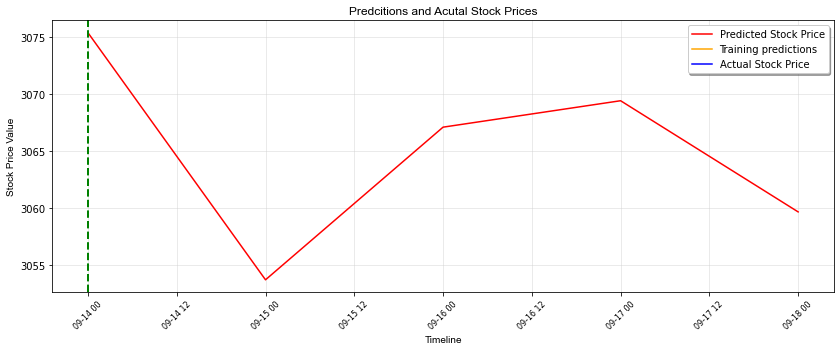

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-06-01'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Open'], color='orange', label='Training predictions')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['Open'], color='b', label='Actual Stock Price')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [72]:
dataset_train = pd.DataFrame(dataset_train, columns=cols)
dataset_train.index = datelist_train
dataset_train.index = pd.to_datetime(dataset_train.index)